<a href="https://colab.research.google.com/github/droyktton/clases_ME_IB/blob/main/ME_2025_SimulacionesNum%C3%A9ricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulaciones Numéricas en Mecánica Estadística

Las primeras simulaciones númericas en computadoras se empezaron a hacer aproximadamente durante la segunda guerra mundial. Varios de los pioneros en simulaciones de hecho estaban trabajando en el proyecto Manhatan, en particular del método de Monte Carlo: *resolver problemas estadísticos usando números aleatorios* (en el casino). Pueden leer sobre la historia del método [aquí](https://tommasorigon.github.io/introR/approfondimenti/Hitchcock2003.pdf).

¿Para que sirven?

* Estudiar cuantitativamente el comportamiento en equilibrio o fuera del equilibrio de modelos matemáticos.

* Poner a prueba, mejorar o sugerir teorías aproximadas, y *descubrir universalidades*.

* Poner a prueba y refinar modelos teóricos comparando sus predicciones frente a experimentos.

* Visualizar, entrenar la intuición física haciendo experimentos númericos.

* Explorar para intepretar experimentos, motivar nuevos experimentos, o para guiar el diseño de nuevos materiales.



La simulación numérica está *en el medio*, entre la teoría y el experimento, entre la sencillez del modelo microscópico y la complejidad emergente, ayudando así a acercar la teoría al experimento. La teoría sugiere ambos, modelos microscópicos minimales y modelos fenomenológicos que pretenden describir el comportamiento emergente.

A veces se abusa del lenguaje diciendo que las simulaciones son *experimentos numéricos con modelos matemáticos*. Así como en un experimento se prepara un dispositivo de medición, se controlan las condiciones del mismo y se ejecuta un protocolo para aislar el fenómeno a estudiar lo mejor posible, así en las simulaciones preparamos un programa para hacer evolucionar el modelo, dejandolo que se "exprese", y medir las propiedades emergentes.

>**La necesidad de hacer simulaciones numéricas está íntimamente relacionada al comportamiento emergente** porque es bien sabido que modelos muy simples pueden producir comportamientos complejos, o que a priori se nos escapan a nuestra intuición física ya que no derivan sencillamente del modelo de partida. Así como un experimento son preguntas cuantitativas que le hacemos a la naturaleza, así una simulación son preguntas que les hacemos a distintos modelos matemáticos microscópicos.



Este gráfico Extraído del libro de Allen Tildesley, "[Computer Simulation of Liquids](https://levich.ccny.cuny.edu/koplik/molecular_simulation/AT2.pdf)", ilustra el lugar que ocupa la simulación, entre el experimento y la teoría.
El fin último es mejorar los modelos para que representen mejor la realidad y las teorías que intentan describir su comportamientos emergentes.

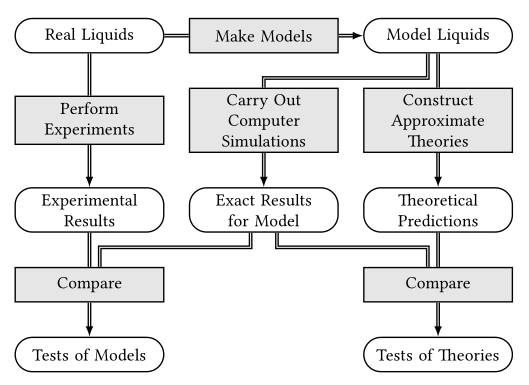

Y este otro también es ilustrativo, del libro "[A Guide to Monte Carlo Simulations in Statistical Physics](http://linux0.unsl.edu.ar/~froma/Optativa/Bibliografia/Landau_Binder_A_Guide_to_Monte_Carlo_Simulations_in_Statistical_Physics.pdf)" de Landau y Paez.

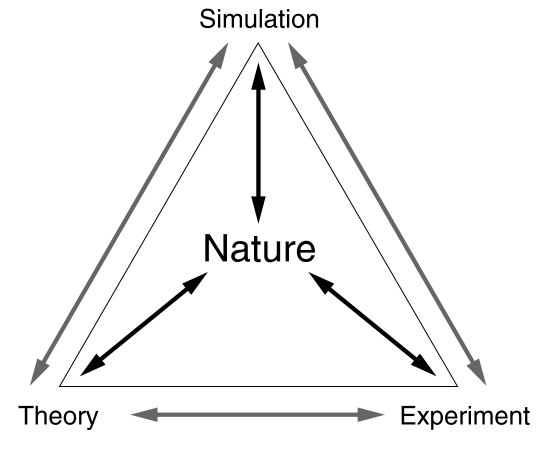

**Estudio de estados estacionarios**

Fuera del equilibrio podemos tener regímenes no estacionarios, en los cuales las propiedades promedio dependen del tiempo o tienen memoria de la condición inicial, y estacionarios, donde no dependen del tiempo, pero que sin embargo no están descriptos por la mecánica estadística de equilibrio, la cual se dedica solo al subconjunto de estados estacionarios en equilibrio térmico.

Si nos concentramos en estados estacionarios (y recordemos que estos no son microscopicamente estáticos!), sean de equilibrio o no, hay dos métodos que son los más populares.

* *La dinámica molecular* se propone calcular propiedades promedio resolviendo las ecuaciones de movimiento del sistema, por ejemplo las de Newton, luego de que el sistema pasa un transitorio u olvida la condición inicial. Genera así trayectorias en un ensemble, con las cuales podemos calcular los promedios temporales, que se asumen iguales a los promedios sobre el ensemble.

* *El método de Monte Carlo* se propone generar estados representativos del ensemble usando números aleatorios, usando la técnica de sampleo por importancia.

Sea $A$ una propiedad, que sea función de la configuración del sistema. El promedio en el estado estacionario después de $M$ pasos de la simulación, está dado por

$$\langle A \rangle=\langle A \rangle_M \pm \sigma_M$$

donde

$$\langle A \rangle_M = \frac{1}{M} \sum_{j=1}^M A(q_j)$$

con $q_j$ todas las coordenadas del sistema al tiempo $j$.
El error se puede calcular así

$$\sigma_M = \frac{\sqrt{\langle A^2 \rangle_M - \langle A \rangle^2_M}}{\sqrt{M/(2\tau +1)}}$$

donde

$$\langle A^2 \rangle_M - \langle A \rangle^2_M
=\frac{1}{M} \sum_{j=1}^M \langle [A(q_j)-\langle A \rangle_M]^2 \rangle
$$

y $\tau$ es el tiempo de correlación, que se puede obtener de la función de autocorrelación de la cantidad,

$$\phi_{AA}(t) = \frac{\langle A(t)A(0)\rangle-\langle A(t)\rangle \langle A(0)\rangle}{\langle A^2\rangle-\langle A\rangle^2}$$

tal que

$$\tau = \sum_{t} \phi_{AA}(t).$$

Aquí $t$ es el tiempo o el número de orden de la configuración en la secuencia generada por la simulación. Estamos aquí usando que la distribución de $A$ es esperada que sea una gausiana centrada en $\langle A \rangle$, aplicando el teorema central del límite para los $M/(2\tau+1)$ bloques (promedios parciales) independientes del promedio.










# La ecuación maestra y las trayectorias

*La dinámica de las muestras vs la dinámica de su histograma*

Si los estados son discretos uno puede generar las trayectorias adecuadas para hacer estadística. Necesitamos primero diseñar el método de generar trayectorias y garantizar de que estas estén bien muestreadas. Necesitamos entonces una ecuación que nos diga como evolucionan las probabilidades de encontrar al sistema en cada estado, una vez que el mismo llega al estado estacionario.

La ecuación maestra es una ecuación de evolución para las probabilidades de observar distintos estados discretos que evolucionan estocásticamente, a un dado tiempo $t$. Representa la evolución de muchas trayectorias a la vez, ya que predice la distribución de probabilidad de todos los estados en función del tiempo.

Una trayectoria es algo como

$$1 \to 1 \to 2 \to 2 \to 3 \to 2 \to 2 \to 3 \to 4 \to 5 \to 6 \to 6 \to 6 \to 7 \to 7 \to 7 \to 7$$

y se supone **markoviana**, es decir que el próximo estado solo está afectado por el estado anterior, pero no por ello quiere decir que es determinista. La misma condición inicial puede generar otras trayectorias, pero siempre se construyen, estocásticamente en general y paso a paso, sin mirar el pasado remoto.

Como hay muchas de estas trayectorias uno puede computar la cantidad de trayectorias de que en el paso $t$ pasan por $i$. Las trayectorias estocásticas forman un ensemble cuya distribución de probabilidad depende del tiempo, y para tiempos cortos puede depender del muestro inicial de trayectorias condición inicial.

Es decir, uno muestrea estados según $P(0)$, los hace evolucionar a cada uno, y con la ecuación maestra puede predecir, cuanto será $P(t)$, en el límite de muchas trayectorias.

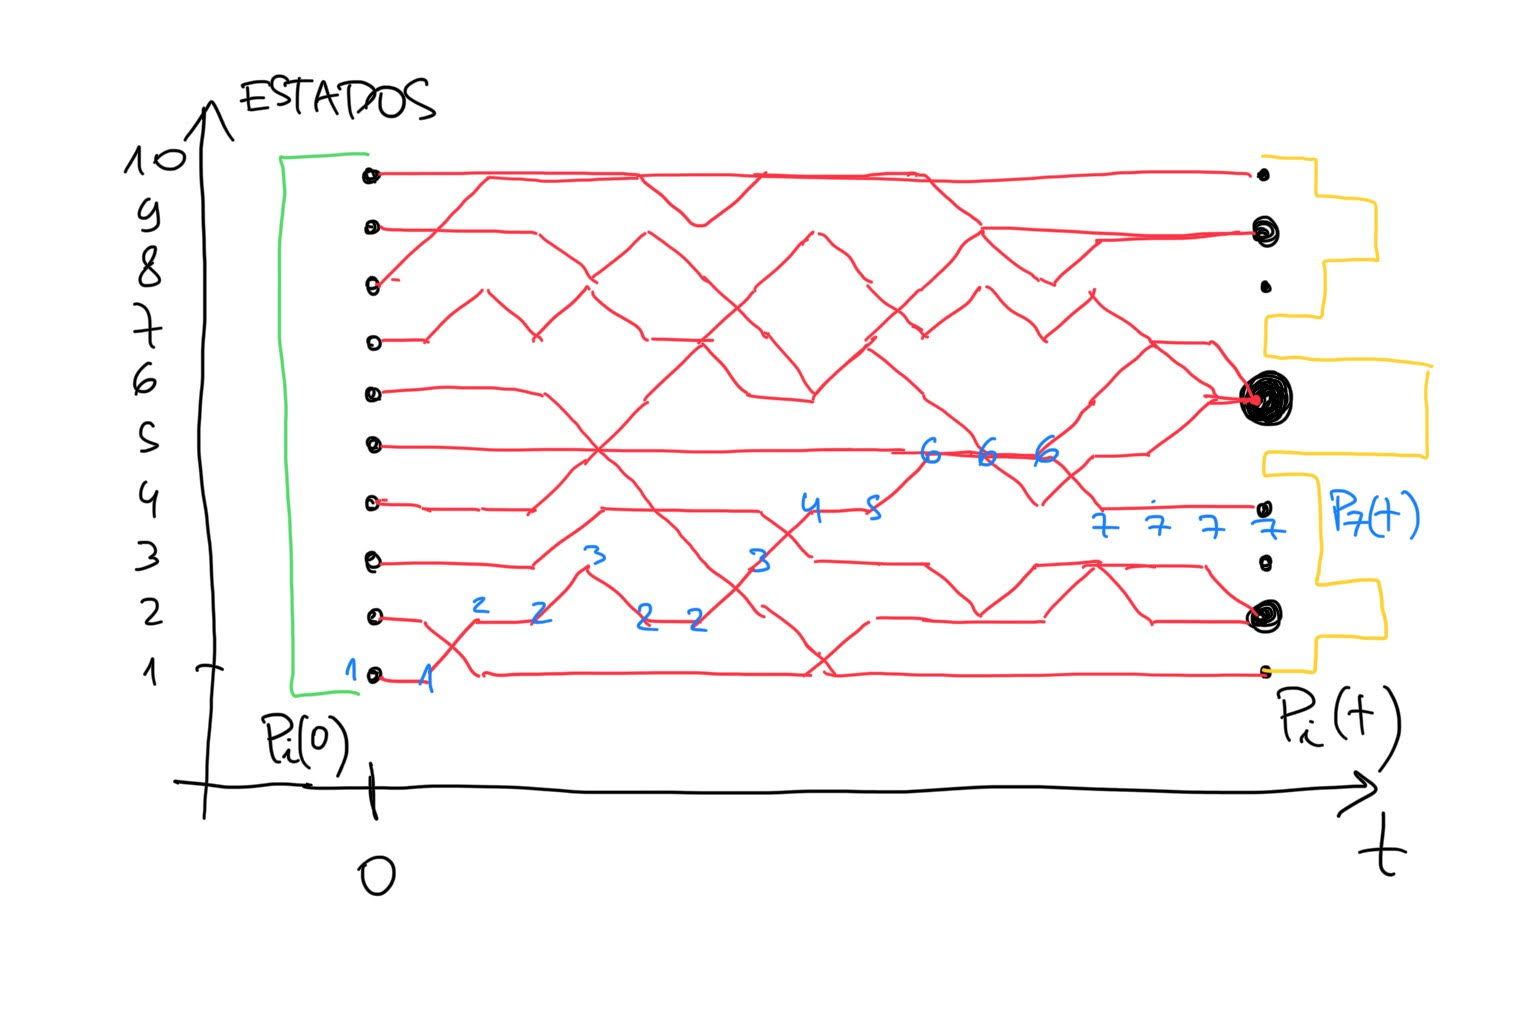

La idea de una simulación de Monte Carlo es generar una trayectoria muy larga, que visite cada configuración con la probabilidad estacionaria deseada, en la cual podamos entonces hacer promedios como promedios "temporales"

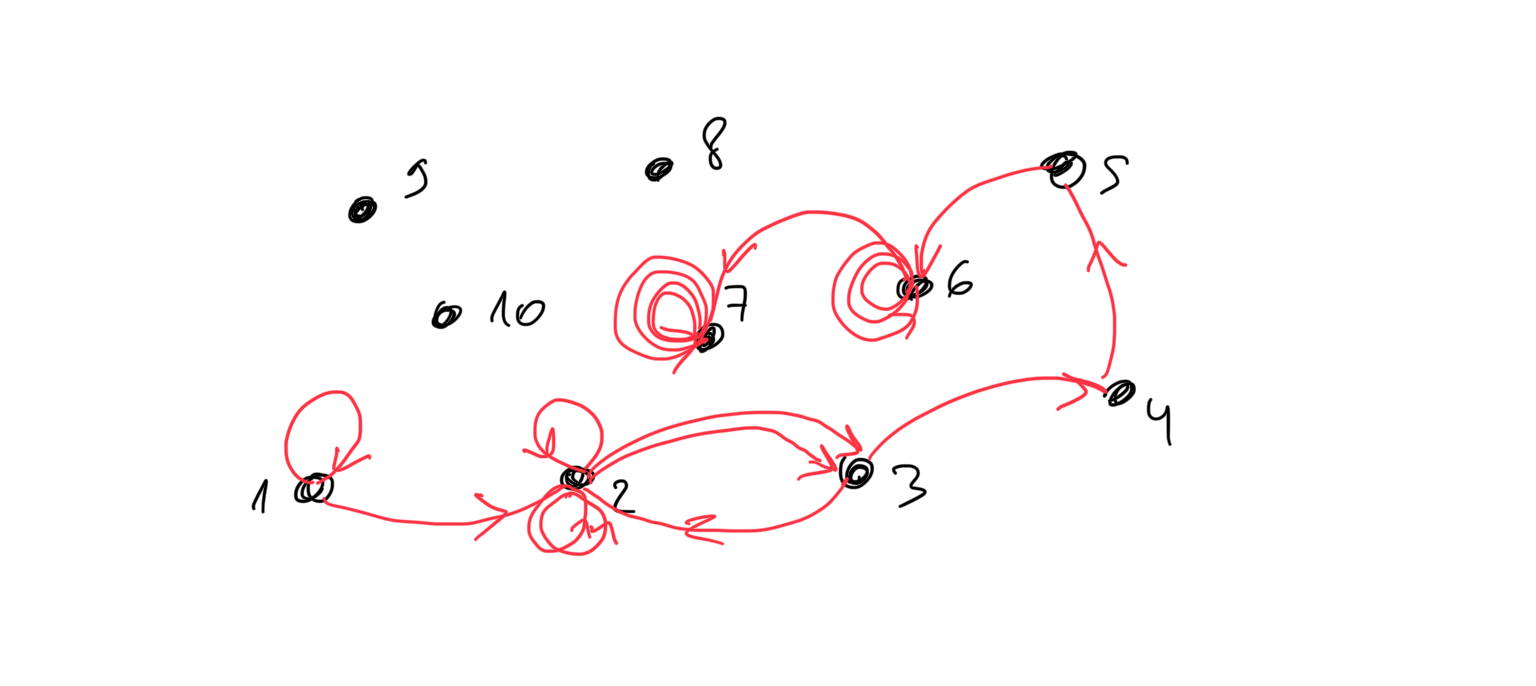

Si los estados son continuos, como las posiciones o momentos de partículas, o cualquier otra variable de estado continua, la ecuación que gobierna las probabilidad es diferencial parcial, y se llama ecuación de Fokker-Planck.

>En física nos encontramos con los dos problemas.
* A veces, las probabilidades de transición son conocidas, pero no conocemos $P_i(t)$, y a veces tampoco $P_i(t\to infty)$, porque por ejemplo es un proceso fuera del equilibrio.  
* Otras veces conocemos $P_i(t\to \infty)$, pero no conocemos la probabilidades de transición. Este problema tiene múltiples soluciones. Una de ellas es la que se usa en MCMC.

## Muestrear configuraciones

Los métodos de Monte Carlo son, en general, los que usan números aleatorios para resolver problemas. Nosotros nos vamos a concentrar en el uso de Monte Carlo en mecánica estadística, como herramienta adicional que permita ir más allá de las limitaciones de los cálculos análiticos.

El problema de la mecánica estadística es básicamente, calcular una función de partición o una energía libre, para poder hacer predicciones sobre propiedades promedio. Ya vimos que la dificultad son las interacciones, que hacen muy difícil la tarea de estimar la suma sobre todos los microestados de un sistema.
La buena noticia es que no hace falta sumar sobre todos estos microestados, sino sobre los más importantes. Pero para eso necesitamos generar esos estados primero.

**¿Porque queremos samplear configuraciones con una distribución?**

Porque si genero muchas configuraciones $q_j$, sampleadas con la frecuencia que le corresponden, el promedio "temporal" sobre los $j=1,\dots, M$, $\langle A \rangle_M$, tiende al promedio en el ensemble $\langle A \rangle$, siempre y cuando sea posible visitar todas las configuraciones permitidas en el ensemble.

Por ejemplo, en el ensemble canónico,

$\langle A \rangle = \sum_q \frac{e^{-\beta E(q)}}{Z} A(q)
\approx \sum_{j=1}^N A({q_j})/M
$

Si las coordenadas del microestado $q$ son continuas también vale,  

$\langle A \rangle = \int  dq \frac{e^{-\beta E(q)}}{Z} A(q)
\approx \sum_{j=1}^N A({q_j})/M
$

Bien, ahora solo necesitamos un método para generar una secuencia de $M\gg 1$ de configuraciones $q_j$, con estas apareciendo con su frecuencia correcta.

> Por eso saber samplear con un peso sirve también para *¡calcular integrales con números aleatorios!* Por ejemplo, el área de un círculo de radio $R$ inscripto en un cuadrado de lado $R$, es el número de veces que un dardo tirado aleatoria y uniformemente en el cuadrado pega en el círculo, dividido por el total de dardos, en el límite de muchos dardos tirados. Parece una tontería, porque se trata de integrar una función constante $1$ en un círculo, pero cuando las integrales se hacen sobre muchas variables, se vuelve el método más sencillo para estimar el valor de la integral.

**La dificultad de samplear muchas variables**

Hacer sampleo *directo* de configuraciones con el peso probabilisto deseado es en general muy difícil, salvo para configuraciones con muy pocos grados de libertad.

*Sampleo directo con "la torre"*
Con una variable es muy sencillo hacer sampleo directo: apilamos todas las probabilidades deseadas de cada valor posible en una torre de altura $1$, y sorteamos un número en $[0,1]$. Ese número indica una altura en la torre que apunta al valor sampleado. Esto es equivalente a hacer cambio de variables aleatorias, desde una distribución aleatoria uniforme por ejemplo a la deseada.

*Sampleo con rechazos*
Otro método de sampleo, pero indirecto, más ineficiente pero muy general consiste en general valores uniformemente, evaluar su peso probabilístico deseado $p$, tirar un número al azar en $[0,1]$, si el número es menor a $p$ lo acepto, y sino lo rechazo.
Y así me genero la secuencia de valores sampleados con la distribución deseada.
El problema de este método es que genero muchos más números aleatorios de los que necesito.

Cualquiera de los dos métodos es inviable si la variable aletoria es en realidad una configuración de $N$ grados de libertad, pues el número de estas crece exponencialmente con $N$. Por un lado, la torre para el sampleo directo debería tener un número exponencialmente grande de pedazos, uno por cada configuración posible. Por el otro, en el método indirecto, serían rechazadas una cantidad muy grande de configuraciones generadas completamente al azar antes de tener una secuencia suficientemente larga para hacer el promedio, ya que las regiones donde la probabilidad es más grande están concentradas en regiones muy reducidas en el espacio de fases o configuraciones.

Necesitamos entonces un método para generar configuraciones con la frecuencia que le corresponden.



## Monte Carlo con Cadenas de Markov

El método de Monte Carlo usando cadenas de Markov o **MCMC** consiste en generar una secuencia de configuraciones cercanas o una trajectoria en el espacio de configuraciones usando números aleatorios inteligentemente tal que luego de muchas iteraciones, estas aparecen como sampleadas de la distribución que uno desee (por ejemplo la de Boltzmann).

Se puede pensar que el método es como una dinámica de no equilibrio, que relaja al estado estacionario de equilibrio, paso a paso, explorando caminos que conectan las configuraciones más probables. Pero una dinámica no necesariamente real.

La única desventaja de Monte Carlo usando cadenas de Markov, respecto a los otros métodos mencionados antes, es que al ser un método local, genera correlaciones temporales entre configuraciones, obligando a iterar por tiempos mucho mayores que ese tiempo de correlación. Por suerte sin embargo, hay métodos para acelerar la dinámica (que no tiene porqué imitar una dinámica real, pues nos interesa que llegue solamente), que es equivalente a reducir este "tiempo" de correlación. Comparado con las limitaciones de los otros métodos que en seguida fracasan por la dimensionalidad del problema, esta desventaja es despreciable sin embargo...

**Cadenas de Markov y Ecuación maestra**
La magia del método de Monte Carlo reside en las cadenas de Markov. Estas son como una caminata al azar que salta inteligentemente entre configuraciones pero *sin memoria*: el siguiente salto solamente está determinado por cual es el microestado ahora, y no cuales fueron los microestados visitados antes. Es un método local. Una cadena de Markov puede expresarse a través de una *ecuación maestra*, en tiempo discreto o en tiempo continuo.

En *tiempo discreto* sería,

$$P_i(t+1)= \sum_j T(j \to i) P_j(t)$$

donde $T(j\to i)$ es la probabilidad de saltar del estado $i$ al $j$ el el tiempo $t$. La matriz con elementos $T_{ij}\equiv T(j\to i)$ es una *matriz de transferencia*.

Si estoy en el estado $i$, en un paso o me voy o me quedo, entonces

$$\sum_{j\neq i} T(i \to j) + T(i\to i) = 1$$

Entonces podemos derivar el cambio en la probabilidad de estar en $i$. De

$$P_i(t+1)
=
\sum_{j\neq i} T(j\to i) P_j(t) + T(i\to i) P_i(t)
=
\sum_{j\neq i} T(j\to i) P_j(t) + (1-\sum_{j\neq i} T(i\to j)) P_i(t)
$$

llegamos a

$$P_i(t+1)-P_i(t)
=
\sum_{j\neq i} T(j\to i) P_j(t) -\sum_{j\neq i} T(i\to j) P_i(t)
$$

donde reconocemos un término de ganancia y otro de pérdida.

**Estado estacionario**

Queremos que el proceso de markov converja a las probabilidades $\pi_i$,
es decir

$$\lim_{t \to \infty}{\bf P}(t) = \pi$$

y que haya solo *una* solución $\pi$ que cumpla

$$\pi_i = \sum_j T(j\to i) \pi_j$$

En otras palabras $\pi$ tiene que ser autovector de ${\bf T}$ con autovalor $1$.

**¿Como diseñamos las $T_{ij}$ para fijar un estado estacionario?**

Tenemos que garantizar que el cambio sea cero para $\pi$, entonces, de la cuenta de más arriba para $P(t+1)-P(t)$, tenemos una condición de *balance global*,
$$
0
=
\sum_{j\neq i} T(j\to i) \pi_j -
\sum_{j\neq i} T(i\to j) \pi_i
$$

que tiene muchas soluciones, pero elegiremos una en particular, la de *balance detallado*,

$$
\boxed{
0
= T(j\to i) \pi_j -T(i\to j) \pi_i
}
$$

no porque sea necesario sino porque facilita mucho las cosas. Físicamente garantiza que no hayan corrientes de probabilidad en el estado estacionario, porque la corriente neta entre cualquier par de estados es cero, lo cual es deseable si queremos interpretar el proceso de Markov como una dinámica realista.

En particular facilita nuestro objetivo de encontrar posibilidades para ${\bf T}$.

**Metropolis**:
Elijo

$$T(j\to i) = \min(1,\pi_i/\pi_j)$$

y vemos que satisface balance detallado pues

$$\min(1,\pi_i/\pi_j) \pi_j =\min(1,\pi_j/\pi_i) \pi_i$$

es siempre cierto ($\pi_i=\pi_i$ si $\pi_i>\pi_j$, sino da $\pi_j=\pi_j$).

**Metropolis-Hasting (MH)**:
Elijo
$$T(j\to i) = \min \left(
  1,\frac{\pi_i q(i\to j)}{\pi_j q(j\to i)}
  \right)$$

donde $q(i\to j)$ es una propuesta a priori de transición, totalmente libre, que uno puede aprovechar para optimizar el algoritmo. En este caso, las propuestas pueden ser asimétricas y aún así hay balance detallado.


Hasta aquí mostramos que la condición de balance detallado nos permite encontrar muchas propuestas para $T(i\to j)$ que hacen que $\pi$ no evolucione, pero **no** es suficiente para que el estado final de $\lim_{t\to \infty} P_i(t)$ desde una dada condición inicial $P(0)$ sea único, pues pueden aparecer componentes desconectados del *grafo* de estados y puedo quedarme sin explorar todos los estados posibles.

Necesitamos
que ${\bf T}$ sea ergódica: que se pueda llegar desde cualquier estado a cualquier otro después de un número finito de pasos, y que converja uniformemente, que no quede oscilando. Se dice que tienen que ser *irreducible y aperiodica* la cadena. Para garantizar esto debemos proponer movidas adecuadas como la de MH. Bajo las concidiones de arriba el **teorema de Perron-Frobenius** nos dice que ${\bf T}^n P$ converge uniformemente a $\pi$.
En síntesis:

* ${\bf T}$ es diagonalizable.
* El máximo autovalor de ${\bf T}$ es $\lambda_1=1$, todos los otros $k > 1$, satisfacen $|\lambda_k|< 1$.
* El autovector de $\lambda_1=1$ es $\pi$ y es único.
* La convergencia a $\pi$ esta controlada por el segundo autovalor con magnitud más grande $|\lambda_2|$.

Entonces $P(t) = \pi + \sum_{k>1} c_k \lambda^t_k \psi_k$, y si $t$ es grande vemos que la convergencia está controlada por $|\lambda_2|$, pues
$P(t)-\pi \sim \lambda_2^{t} =
e^{\ln(|\lambda_2|) t}\to 0$ ($|\lambda_2|<1$). Esto significa que despues de muchas iteraciones ${\bf P}$ tiende a un único límite ${\bf P}_{eq}$ desde cualquier condicion inicial, exponencialmente rápido, en un tiempo $\tau = -1/\ln(|\lambda_2|)$, el tiempo de correlación temporal de las configuraciones de la cadena de Markov.


> Notar que es muy parecido a la matriz de transferencia del Ising 1d. Así que aquí hay una conexión misteriosa entre el proceso dinámico de la ecuación maestra en tiempo del MCMC, y las correlaciones espaciales de modelos unidimensionales con interacciones a primeros vecinos... Y para sumar mas misterio, digamos que la ecuación maestra, en tiempo continuo, es muy parecida a una ecuación de Schrodinger en tiempo imaginario...




## Ejemplo de Cadena de Markov sencilla

>Este ejemplo lo saque del libro de W. Krauth, *Statistical Mechanics: Algorithms and Computations*.
[Libro](https://www.amazon.com/Statistical-Mechanics-Algorithms-Computations-Physics/dp/0198515367
),[Códigos](https://github.com/weka511/smac),
[Coursera](https://www.coursera.org/learn/statistical-mechanics?utm_medium=sem&utm_source=gg&utm_campaign=b2c_latam_x_multi_ftcof_career-academy_cx_dr_bau_gg_pmax_gc_s1-v2_en_m_hyb_24-04_nonNRL-within-14d&campaignid=21239613742&adgroupid=&device=c&keyword=&matchtype=&network=x&devicemodel=&creativeid=&assetgroupid=6501905150&targetid=&extensionid=&placement=&gad_source=1&gad_campaignid=21320925518&gbraid=0AAAAADdKX6aCPOAhMlZZpCG5KJAI27-99&gclid=EAIaIQobChMI-cO8h9L3kAMVqkFIAB3dUTBxEAAYASAAEgJxWfD_BwE)


Supongan que quieren muestrear 9 estados con probabilidad uniforme $\pi_i=1/9$.

Por supuesto, esto es muy sencillo hacerlo tirando un número entero al azar entre $1$ y $9$, con igual probabilidad. Es decir, se puede hacer por *sampleo directo*. Pero en general los sistemas tienen un número exponencial de estados en el número de grados de libertad y la probabilidad $\pi_i$ no es uniforme. En esos casos es mejor usar MCMC.

Organicemos los estados en una grilla de $3 \times 3$ y realicemos una caminata aleatoria por el mismo, moviéndonos de una celda a una vecina y sin condiciones de contorno periódicas. Esto ya define un grafo por un lado, y la matriz de transición que da peso a los links. De hecho *cualquier grafo dirigido pesado puede ser representado por una matriz* (la matriz de adyacencia [link text](https://en.wikipedia.org/wiki/Adjacency_matrix)), en nuestro caso de $9 \times 9$.



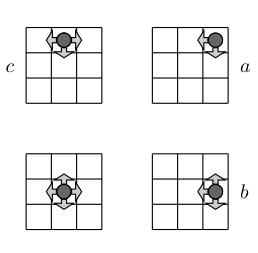

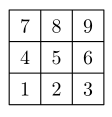

Como $\pi_i$ es uniforme hay que proponer transiciones simétricas. Esto me obliga a que por ejemplo

$p(1\to 2)=p(2\to 1)$, pero 1 tiene dos vecinos y 2 tiene tres. Como el 2 da igual peso a todas sus posibilidades, $p(2\to 1)=p(2\to 3)=p(2\to 5)=p(2\to 2)=1/4$, Pero 5 tiene 4 vecinos, y si les da a todos el mismo peso
$p(5 \to 5)=0$.  Como $p(1\to 2)=1/4$, y por simetría $p(1 \to 4)=1/4$ también, necesariamente $p(1\to 1)=1/2$. Y así, todos los que estan en las esquinas tienen $p(i\to i)=1/2$, los que estan en los bordes $p(j\to j)=1/4$ y el central cero. La matriz va a tener muchos ceros claro esta, porque es una matriz de $9 \times 9$, o sea 81 elementos, pero solo serán distintos de cero $5 + 16 + 12 = 33$. Es un grafo ralo dirigido y pesado que cumple la condición de balance detallado, aunque no es el único.



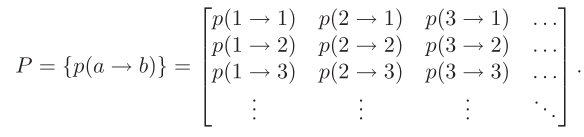

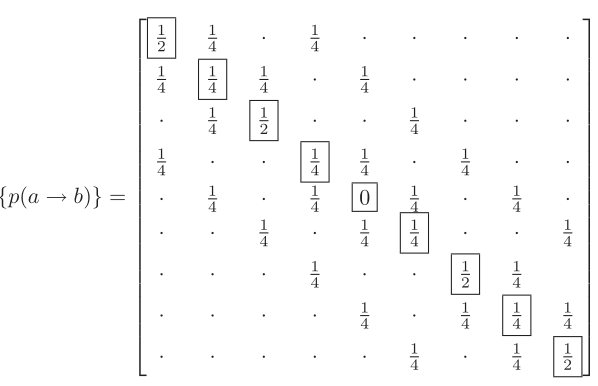

Podemos resolver la ecuacion maestra fácilmente, simplemente iterando.

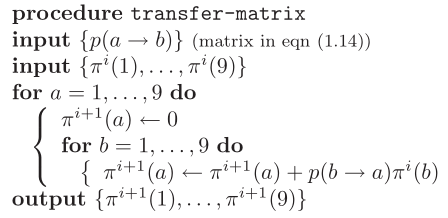

Y asi podemos ver como converge a la solucion deseada, en cualquier estado o celda de la grilla. Y lo que vemos es que converge exponencialmente. Después de aproximadamente una decena de pasos, la trayectoria se olvida de su condicion inicial y visita por igual a todas las celadas, como queriamos.

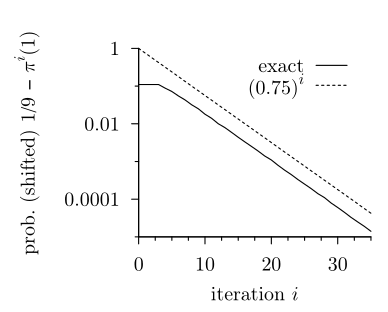

El $0.75$ no es más que el segundo autovalor más grande, como ya habiamos anticipado. Lamentablemente es muy dificil diagonalizar una matriz exponencialmente grande, así que este tiempo de espera es difícil de estimar en general.

A continuacion un programita que aplica la matriz de transferencia varias veces sobre una condicion inicial muy particular.

In [ ]:
'''Model Monte Carlo simulation as a transfer matrix, illustrating speed of convergence'''
from numpy import dot, zeros

neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = zeros((9, 9))
for k in range(9):
    for neigh in range(4): transfer[neighbor[k][neigh], k] += 0.25
position    = zeros(9)
position[8] = 1.0
for t in range(100):
    print (t,'  ',["%0.5f" % i for i in position])
    position = dot(transfer, position)

Y ahora analizemos los autovalores y autovectores

In [ ]:
'''Eigenvalues and eigenvectiors of transfer matrix, illustrating speed of convergence'''
from numpy        import zeros
from numpy.linalg import eig

neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = zeros((9, 9))
for k in range(9):
    for neigh in range(4): transfer[neighbor[k][neigh], k] += 0.25
eigenvalues, eigenvectors = eig(transfer)

for i in range(len(eigenvalues)):
    print (eigenvalues[i])
    print (eigenvectors[:,i])

Como se puede apreciar, hay un autovalor 1 y su autovector es uniforme, pero falta normalizarlo. El segundo autovalor es 0.75, lo que explica la velocidad de convergencia de la cadena.

**¿Como generar trayectorias que siguen esta cadena de Markov?**

Es una pregunta relevante porque la idea no es resolver la ecuación maestra. Primero porque ya conocemos la solución estacionaria, ¡ya que nosotros mismos la hemos propuesto! Tampoco sería viable en un sistema con un número exponencial de estados en $N$. Lo que queremos es *samplear* trayectorias cuyo histograma siga a cada tiempo $P_i(t)$, la governada por la ecuación maestra.

En la cadena sencilla que hemos estudiado, todo lo que hay que hacer es agarrar una partícula en un celda, y proponerle moverse a una de las celdas vecinas permitidas. La aceptación es inmediata según Metropolis,
ya que $T(i\to j)=1$ para una transición permitida. Desde este punto de vista no hay gran soprpresa, ya que una partícula moviéndose al azar así, recorrerá todos las celdas por igual después de un tiempo largo.
De $(0.75)^i = \exp(i \ln(0.75))$ de la cadena de Markov vemos que el tiempo de equilibración es $-1/\ln(0.75) \approx 3.5$, asi que podríamos empezar a tomar promedios después de 4 pasos aproximadamente.

En general, los tiempos de equilibración de MCMC son mucho más largos y es difícil saber a priori cuanto, pero podemos monitorear la evolución y ver cuando los valores medios convergen a su valor estacionario. En el modelo de Ising estos tiempos son muy grandes cerca de la transición de fase. En sistemas desordenados pueden ser gigantescos.


In [ ]:
import numpy as np
-1./np.log(0.75)

np.float64(3.476059496782207)

# Metropolis Monte Carlo para el modelo de Ising 2d en una red cuadrada

La ecuacion maestra solo nos sirve para mostrar que la cadena converge, pero no es viable resolverla para una cantidad exponencial de estados, y tampoco nos interesa hacerlo ya que ya sabemos la solución. Lo que nos interesa es pasar de ella al mundo de las trayectorias.

La probabilidad de transición es

$$T(\sigma \to -\sigma')=\frac{1}{N}A(\sigma \to \sigma')=
\frac{1}{N} \min(1,e^{-\beta \Delta E})
$$
con $\Delta E$ el cambio **total** de energía de cambiar $\sigma \to \sigma'$. Como las interacciones son de corto alcance, el cambio $\Delta E$ solo necesita calcular el cambio de las interacciones con los primeros vecinos.

La estructura del programa es la siguiente:

Se aloca memoria e inicializa primero una red de $L \times L$ espines usando un vector de enterios.
La idea del loop principal del programa, que se repite el número de pasos de Monte Carlo deseados, es:

* Elegir un sitio al azar $i$.
* Calcular el cambio total de energía de flipearlo
$\Delta E = 2 s_i \sum_{j \in vec_i} s_j$, donde
$\sum_{j \in vec_i} s_j$ es el campo local que ve $i$ debido a sus vecinos.
* Aceptar si $\Delta E< 0$ o si $r<\exp[-\Delta E/T]$,
torando un número al azar $r$ uniforme en $[0,1]$. Sino  se rechaza el flip.
* Después de intentar flipear $N$ espines, a lo que se llama paso de Monte Carlo, calcular la magnetización por sitio y acumularla para luego calcular valor medio.

El programa termina imprimiendo la temperatura y magnetización media por sitio.

Y aquí abajo una version minimal en C++. Usa un el generador de números aleatorios mersenne-twister. Es muy importante que los números estén distribuídos uniformemente que estén descorrelacionados entre sí.

In [ ]:
%%writefile Ising2d.cpp

#include <iostream>
#include <vector>
#include <random>
#include <cmath>

int main(int argc, char **argv) {
    const int L = 32;                 // Linear system size
    const int N = L * L;              // Total sites
    const int equil_steps = 5000;     // Steps before measuring
    const int mc_steps = 20000;       // Steps for measurement
    double T = 2.4;                   // Temperature

    if(argc>1) T=atof(argv[1]);

    std::mt19937 gen(12345);
    std::uniform_real_distribution<double> uni(0.0, 1.0);
    std::uniform_int_distribution<int> site(0, N-1);

    // Initialize spins: all +1
    std::vector<int> s(N, 1);

    // periodic boundary conditions
    auto idx = [&](int x, int y) {
        return (x + L) % L + L * ((y + L) % L);
    };

    auto metropolis_step = [&]() {
        int i = site(gen);
        int x = i % L;
        int y = i / L;

        int si = s[i];

        // local field
        int sum_nn =
              s[idx(x+1,y)] + s[idx(x-1,y)] +
              s[idx(x,y+1)] + s[idx(x,y-1)];

        // energy change from flip
        double dE = 2 * si * sum_nn;

        // metropolis
        if (dE <= 0 || uni(gen) < std::exp(-dE / T))
            s[i] = -s[i];
    };

    // Equilibrate
    for (int t = 0; t < equil_steps * N; t++)
        metropolis_step();

    // Measure magnetization
    double m_sum = 0.0;

    for (int t = 0; t < mc_steps * N; t++) {
        metropolis_step();

        if (t % N == 0) {
            double m = 0.0;
            for (int i = 0; i < N; i++)
                m += s[i];
            m_sum += m / N;
        }
    }

    std::cout << "Temp= " << T << ", Mag/N= " << m_sum / mc_steps << "\n";
}


In [ ]:
!g++ Ising2d.cpp -o Ising2d

In [ ]:
!/content/Ising2d 3.0


Y aquí una [simulación con visualización en tiempo real en p5](https://editor.p5js.org/droyktton/full/iuFSmQ3jN) del modelo de Ising 2d, usando Metropolis Monte Carlo.


# Otras Aplicaciones general del MCMC

El MCMC se usa en muchas áreas de la ciencia, pero también de la ingeniería, de la matemática aplicada, o más recientemente de la inteligencia artificial.

Uno de los usos más generales que se le da es la *optimización*, que es encontrar los parámatros óptimos de una función que minimizan una función de costo. Esta función de costo puede ser la energía de un sistema, al cual le queremos encontrar el estado fundamental, o bien la función de costo que mide el grado de aprendizaje de una red neuronal, o bien el camino óptimo que debería seguir el correo para hacer sus entregas, y un millón de etc.




## Simulated annealing

Consiste en usar MCMC con una rampa decreciente de temperatura. La idea es empezar con una $T$ alta, para dejar que el sistema explore mucho al principio y no se quede trabado en mínimos locales, y luego ir bajando de a poco la $T$ para que explore los mínimos profundos.
Está claro que poner $T=0$ de una no garantiza que un sistema encuentre solito el estado fundamental, muy probablemente no lo hará.






# Propiedades Piolas de la matriz de transición con balance detallado

Una matriz de transición reversible se comporta como un operador simétrico disfrazado de proceso probabilístico. Al quitarle el disfraz —mediante la transformación de similitud $S = D^{1/2} P D^{-1/2}$— aparece un objeto con espectro real y modos ortogonales. Aquí va el resumen.

Sea $P$ una matriz de transición estrictamente positiva que satisface equilibrio detallado respecto de una distribución estacionaria $\pi$:
$$
\pi_i P_{ij} = \pi_j P_{ji}.
$$
Sea $D=\mathrm{diag}(\pi_1,\dots,\pi_n)$. Entonces:

**1. Similaridad con una matriz simétrica.**
La matriz transformada $S = D^{1/2} P D^{-1/2}$ es simétrica. Todas las propiedades espectrales provienen de este hecho.

**2. Autovalores reales y bien ordenados.**
Como (S) es simétrica, todos los autovalores de (P) son reales.
Para una matriz estocástica se ubican en el intervalo $[-1,1]$, con
$$
\lambda_1 = 1, \qquad |\lambda_k| \le 1.
$$
La positividad implica que $P$ es primitiva, así que $\lambda_1 = 1$ es simple.

**3. Base propia ortogonal en un producto interno ponderado.**
Los autovectores de $P$ son ortogonales con respecto al producto interno
$$
\langle x, y \rangle_\pi = \sum_i \frac{x_i\; y_i}{\pi_i}.
$$
Esto se hereda de la ortogonalidad de los autovectores de la matriz simétrica $S$.

**4. Relación entre autovectores derechos e izquierdos.**
Si $r$ es un autovector derecho que cumple
$$
P r = \lambda r,
$$
el autovector izquierdo correspondiente es
$$
l_i = \pi_i, r_i.
$$
La única diferencia es el peso dado por (\pi).

**5. La brecha espectral controla la convergencia.**
La velocidad con la que la cadena se acerca al equilibrio depende de
$$
\gamma = 1 - \max_{k\ge 2} \lambda_k.
$$
La reversibilidad garantiza que esta brecha esté bien definida y conecte directamente con los tiempos de mezcla y la disminución de varianzas.

**6. Expansión en modos ortogonales.**
Toda función sobre el espacio de estados puede descomponerse en la base propia:
$$
f = c_1 \mathbf{1} + \sum_{k\ge 2} c_k r^{(k)},
$$
con coeficientes determinados por el producto interno $\pi$-ponderado. La evolución temporal multiplica cada modo por $\lambda_k^t$, dando una descripción espectral clara de la relajación.

En conjunto, la reversibilidad convierte una cadena de Markov en un operador casi clásico: elimina la falta de normalidad que suele complicar las matrices no simétricas y pone en su lugar la geometría serena de una matriz simétrica escondida bajo la superficie.


# Correspondencias

hay distintas ecuaciones que gobiernan la distribución de probabilidad de un sistema estocástico, es decir uno que puede tener distintas trayectorias con la misma condición inicial..

* Ecuación maestra con caminatas al azar en una red o grafo.
* Ecuación de Fokker-Planck, con dinámica de Langevin de variables continuas.

Estas se pueden extender en muchas direcciones, y no necesariamente ser markovianas.

# Balance detallado

Que haya intercambio pero no corriente neta entre cualquier par de estados $A$ y $B$. Las pelotitas son muestras de $P(A)$ y muestras de $P(B)$.

<img src="https://docs.google.com/drawings/d/e/2PACX-1vSxR1nzeTE_w2PubdNQfYk_sqYcFQUbakLVHHCMxUsk2XtglcbPh9F1NkSeVJLPbt_AGM1qe8N0jbS4/pub?w=960&amp;h=720">

# Caminata al azar en Bariloche, con su matriz de transición

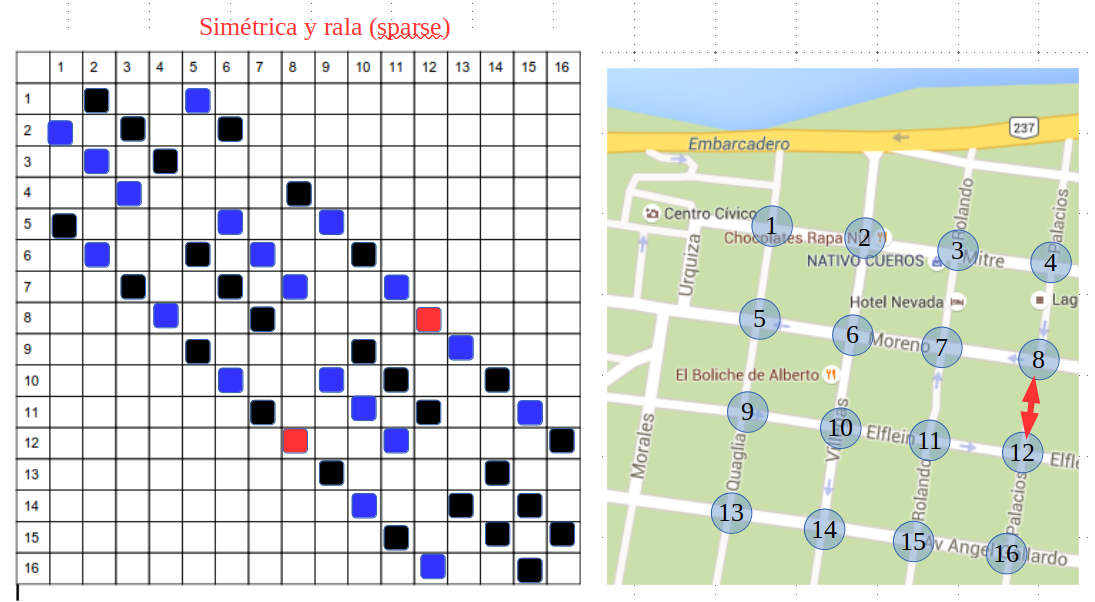

La matriz de adyacencia y sus potencias me dicen cuantos caminos unen cualquier esquina con cualquier otra en un número dado de pasos.

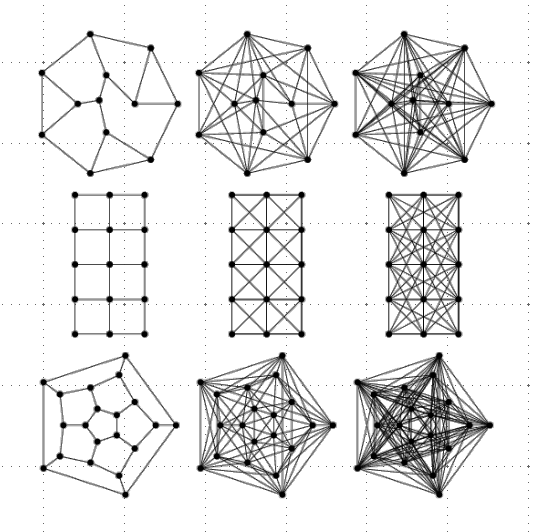

Se pueden asociar grafos también a

* Relaciones sociales, los famosos seis grados de separación, y también la importancia para la transmisión de enfermedades, chismes, fake news, etc.
* A las páginas web y de ahí salió el algoritmo que catapultó a google.

Y puede haber o no una dinámica sobre el grafo, como hacemos en MCMC.